## Exercise 8 - K-means clustering

- Download the dataset from [here](http://student.labranet.jamk.fi/~hantt/data/voice.csv)
- This dataset will be used in exercises 8, 9 and 10
- Dataset includes male and female voice samples with different features
- In this exercise you will use unsupervised machine learning method called K-means clustering for the dataset

1 Import all necessary libraries. Then load the dataset and save it to the dataframe. In this exercise you will use only meanfun (*average of fundamental frequency measured across acoustic signal*) and minfun (*minimum fundamental frequency measured across the acoustic signal*) columns. Filter data so that only forementioned columns will be included.

In [ ]:
import pandas as pd

df = pd.read_csv('data_files/voice.csv')

df_filtered = df[['meanfun', 'minfun']]
df_filtered

2 Run the predictions for the data so that it will be categorised for male and female data.

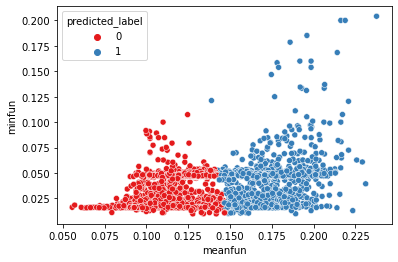

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns

df = pd.read_csv('data_files/voice.csv')
df = df[['meanfun', 'minfun', 'label']]

df['label'] = df['label'].map({'male': 0, 'female': 1})

num_clusters = 2

kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(df[['meanfun', 'minfun']])

df['predicted_label'] = kmeans.labels_

sns.scatterplot(x='meanfun', y='minfun', hue='predicted_label', data=df, palette='Set1');


3 Visualise the data so that clusters for male and female data will be presented in scatter plot (centroids should also be included).

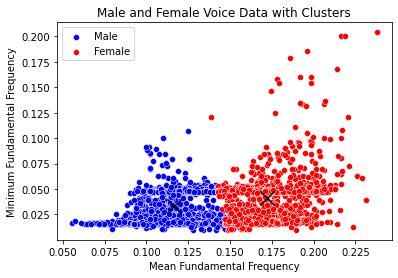

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

df = pd.read_csv("data_files/voice.csv")
df = df[['meanfun', 'minfun']]

kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(df)

male_df = df[clusters == 0]
female_df = df[clusters == 1]

male_centroid = kmeans.cluster_centers_[0]
female_centroid = kmeans.cluster_centers_[1]

sns.scatterplot(x=male_df['meanfun'], y=male_df['minfun'], color='blue', label='Male')
sns.scatterplot(x=female_df['meanfun'], y=female_df['minfun'], color='red', label='Female')
plt.scatter(male_centroid[0], male_centroid[1], color='black', marker='x', s=200)
plt.scatter(female_centroid[0], female_centroid[1], color='black', marker='x', s=200)
plt.xlabel('Mean Fundamental Frequency')
plt.ylabel('Minimum Fundamental Frequency')
plt.title('Male and Female Voice Data with Clusters')
plt.legend()
plt.show()


4 Validate K-means clustering prediction results using confusion matrix.